# Table of Contents

# Credit EDA Case Study

## Problem Statement
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending(to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study. In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

# Importing Libraries

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Application Data



## Data Loading and Inspection

In [4]:
# Reading the csv file 'application_data.csv' using 'read_csv'
app_df = pd.read_csv('application_data.csv')

In [5]:
# Check upper Rows and Columns
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Check lower Rows and Columns
app_df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [7]:
# Checking no. of rows and columns of dataframe
app_df.shape

(307511, 122)

In [8]:
# Check the column-wise info of the dataframe
app_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [9]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [11]:
app_df.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [12]:
# Percentage of null values in each column
null_percentage = app_df.isnull().sum()/len(app_df)*100

In [13]:
null_percentage.sort_values(ascending = False).head(50)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

# Data Cleaning

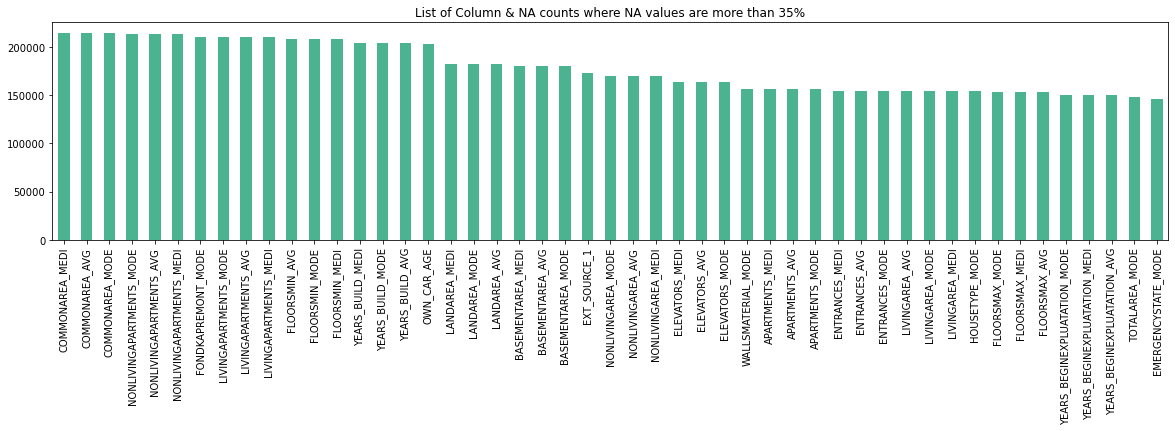

In [14]:
# List of columns and NA counts where NA values are more than 35%
NA_column = app_df.isnull().sum().sort_values(ascending = False)
NA_column = NA_column[NA_column.values >(0.35*len(app_df))]
plt.figure(figsize=(20,4))
NA_column.plot(kind='bar', color="#4CB391")
plt.title('List of Column & NA counts where NA values are more than 35%')
plt.show()

In [15]:
# Number of columns having percentage of null values > 35%
len(NA_column)

49

In [16]:
# Function to remove the columns having percentage of null values > 35%
def removeNulls(dataframe,percent=0.35):
    df = dataframe.copy()
    ishape = df.shape
    columnnames = (df.isnull().sum()/len(df))
    columnnames = list(columnnames[columnnames.values>=percent].index)
    df.drop(labels = columnnames,axis =1,inplace=True)
    print("Number of Columns dropped\t:",len(columnnames))
    print("\nOld dataset rows,columns",ishape,"\nNew dataset rows,columns",df.shape)
    return df

In [17]:
# Comparison of shape of new and old data sets
app_df = removeNulls(app_df, percent = 0.35)

Number of Columns dropped	: 49

Old dataset rows,columns (307511, 122) 
New dataset rows,columns (307511, 73)


In [18]:
# Checking the % of null values for each column in new dataset
null = app_df.isnull().sum()/len(app_df)*100
null.sort_values(ascending = False).head(60)

OCCUPATION_TYPE               31.345545
EXT_SOURCE_3                  19.825307
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
NAME_TYPE_SUITE                0.420148
OBS_30_CNT_SOCIAL_CIRCLE       0.332021
DEF_30_CNT_SOCIAL_CIRCLE       0.332021
OBS_60_CNT_SOCIAL_CIRCLE       0.332021
DEF_60_CNT_SOCIAL_CIRCLE       0.332021
EXT_SOURCE_2                   0.214626
AMT_GOODS_PRICE                0.090403
AMT_ANNUITY                    0.003902
CNT_FAM_MEMBERS                0.000650
DAYS_LAST_PHONE_CHANGE         0.000325
FLAG_DOCUMENT_17               0.000000
FLAG_DOCUMENT_18               0.000000
FLAG_DOCUMENT_21               0.000000
FLAG_DOCUMENT_20               0.000000
FLAG_DOCUMENT_19               0.000000
FLAG_DOCUMENT_2                0.000000
FLAG_DOCUMENT_3                0.000000


# To impute Missing Values In Some Columns

### Impute the missing values for the column 'OCCUPATION_TYPE' with mode, which is the value 'Laborers'

In [19]:
app_df.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [20]:
app_df.OCCUPATION_TYPE.mode()

0    Laborers
Name: OCCUPATION_TYPE, dtype: object

#### Impute the missing values for the column 'AMT_REQ_CREDIT_BUREAU_YEAR' with mode, which is the value '0'.

In [21]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
25.0        1
23.0        1
22.0        1
21.0        1
20.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [22]:
app_df.AMT_REQ_CREDIT_BUREAU_YEAR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

#### We can impute the missing values of columns 'AMT_REQ_CREDIT_BUREAU_MONTH','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_QRT' with the mode, which is the value '0'. Since they all are number of credit inquiries, replacing missing values with the most frequent value would make more sense.

In [23]:
app_df.AMT_REQ_CREDIT_BUREAU_MON.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [24]:
app_df.AMT_REQ_CREDIT_BUREAU_WEEK.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [25]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [26]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [27]:
app_df.AMT_REQ_CREDIT_BUREAU_QRT.mode()

0    0.0
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

### For the column 'AMT_GOODS_PRICE', we can impute the missing values with the median, which is the value '450000'

In [28]:
app_df.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25282
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [29]:
# Finding the median for 'GOODS PRICE'
app_df.AMT_GOODS_PRICE.median()

450000.0

### For the column 'AMT_ANNUITY', we can impute the missing values with the median, which is the value '24903.0'

In [30]:
app_df.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5514
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

In [31]:
# Finding the median for 'AMT_ANNUITY'
app_df.AMT_ANNUITY.median()

24903.0

## Errors in Data Types and Data

#### Imputing the absolute values in column which containing days in negative numbers

In [32]:
# Checking the values present in columns starting with 'DAYS'
print(app_df['DAYS_BIRTH'].unique())
print(app_df['DAYS_EMPLOYED'].unique())
print(app_df['DAYS_REGISTRATION'].unique())
print(app_df['DAYS_ID_PUBLISH'].unique())
print(app_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ -9461 -16765 -19046 ...  -7951  -7857 -25061]
[  -637  -1188   -225 ... -12971 -11084  -8694]
[ -3648.  -1186.  -4260. ... -16396. -14558. -14798.]
[-2120  -291 -2531 ... -6194 -5854 -6211]
[-1134.  -828.  -815. ... -3988. -3899. -3538.]


In [33]:
# The columns starting with 'DAYS'
filter_column = [column for column in app_df if column.startswith('DAYS')]
filter_column

['DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'DAYS_LAST_PHONE_CHANGE']

In [36]:
# Applying abs() function to columns starting with 'Days' to convert the negative values to positive
app_df[filter_column]= abs(app_df[filter_column])

In [37]:
print(app_df['DAYS_BIRTH'].unique())
print(app_df['DAYS_EMPLOYED'].unique())
print(app_df['DAYS_REGISTRATION'].unique())
print(app_df['DAYS_ID_PUBLISH'].unique())
print(app_df['DAYS_LAST_PHONE_CHANGE'].unique())

[ 9461 16765 19046 ...  7951  7857 25061]
[  637  1188   225 ... 12971 11084  8694]
[ 3648.  1186.  4260. ... 16396. 14558. 14798.]
[2120  291 2531 ... 6194 5854 6211]
[1134.  828.  815. ... 3988. 3899. 3538.]


In [38]:
app_df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [39]:
app_df.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

## Imputing the value'XNA' which means not available for the column 'CODE_GENDER'

In [40]:
# Replacing XNA value with F
app_df.loc[app_df.CODE_GENDER == 'XNA','CODE_GENDER'] = 'F'
app_df.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [41]:
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

## Imputing the value'XNA' which means not available for the column 'ORGANIZATION_TYPE'

In [42]:
# Replacing XNA with NaN
app_df = app_df.replace('XNA',np.NaN)

In [43]:
app_df.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    67992
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transport: type 3          1187
Industry

## Binning of continuous variables

In [44]:
# Binning 'AMT_INCOME_RANGE' based on quantiles
app_df['AMT_INCOME_RANGE'] = pd.qcut(app_df.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', "MEDIUM", 'HIGH', 'VERY_HIGH'])
app_df['AMT_INCOME_RANGE'].head(11)

0        MEDIUM
1          HIGH
2      VERY_LOW
3           LOW
4           LOW
5      VERY_LOW
6        MEDIUM
7     VERY_HIGH
8           LOW
9           LOW
10          LOW
Name: AMT_INCOME_RANGE, dtype: category
Categories (5, object): ['VERY_LOW' < 'LOW' < 'MEDIUM' < 'HIGH' < 'VERY_HIGH']

In [45]:
app_df['AMT_CREDIT_RANGE'].head(10)

KeyError: 'AMT_CREDIT_RANGE'

In [48]:
app_df['AMT_CREDIT_RANGE'].head(10)

KeyError: 'AMT_CREDIT_RANGE'

In [49]:
# Converting 'DAYS_BIRTH' to years
app_df['DAYS_BIRTH']= (app_df['DAYS_BIRTH']/365).astype(int)

In [50]:
app_df['DAYS_BIRTH'].unique()

array([25, 45, 52, 54, 46, 37, 51, 55, 39, 27, 36, 38, 23, 35, 26, 48, 31,
       50, 40, 30, 68, 43, 28, 41, 32, 33, 47, 57, 65, 44, 64, 21, 59, 49,
       56, 62, 53, 42, 29, 67, 63, 61, 58, 60, 34, 22, 24, 66, 69, 20])

In [51]:
# Binning 'DAYS_BIRTH'
app_df['DAYS_BIRTH_BINS']=pd.cut(app_df['DAYS_BIRTH'], bins=[19,25,35,60,100])

In [52]:
app_df['DAYS_BIRTH_BINS'].value_counts()

(35, 60]     185900
(25, 35]      75925
(60, 100]     29368
(19, 25]      16318
Name: DAYS_BIRTH_BINS, dtype: int64

# Analysis

### Finding Outliers

In [53]:
app_df = app_df[~(app_df.AMT_INCOME_TOTAL > 0.2*10**8)]
app_df.shape

(307510, 75)

#### Analyse AMT_INCOME_TOTAL column for outliers

In [54]:
app_df.AMT_INCOME_TOTAL.describe()

count    3.075100e+05
mean     1.684180e+05
std      1.088118e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.800009e+07
Name: AMT_INCOME_TOTAL, dtype: float64

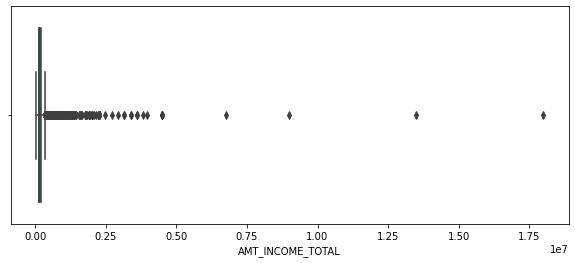

In [55]:
# Check the INCOME again
plt.figure(figsize=[10,4])
sns.boxplot(app_df.AMT_INCOME_TOTAL)
plt.show()

#### Analyse AMT_CREDIT column for outliers

In [56]:
app_df.AMT_CREDIT.describe()

count    3.075100e+05
mean     5.990261e+05
std      4.024914e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

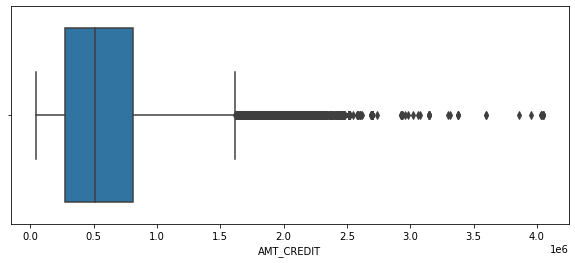

In [57]:
plt.figure(figsize=[10,4])
sns.boxplot(app_df.AMT_CREDIT)
plt.show()

In [58]:
app_df.AMT_CREDIT.quantile([.5, .7, .9, .95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [59]:
# Check rows which lies above the 99th percentile

app_df[app_df.AMT_CREDIT > 1854000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_INCOME_RANGE,DAYS_BIRTH_BINS
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,...,0,0,0.0,0.0,0.0,0.0,0.0,3.0,HIGH,"(25, 35]"
337,100389,0,Cash loans,M,Y,Y,0,247500.0,1971072.0,68643.0,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,HIGH,"(35, 60]"
341,100393,0,Cash loans,M,Y,Y,2,405000.0,2250000.0,59485.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,VERY_HIGH,"(35, 60]"
441,100508,0,Cash loans,F,Y,Y,0,450000.0,1971072.0,62019.0,...,0,0,0.0,0.0,0.0,0.0,4.0,1.0,VERY_HIGH,"(35, 60]"
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,VERY_HIGH,"(35, 60]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,...,0,0,0.0,0.0,0.0,0.0,0.0,5.0,LOW,"(35, 60]"
307095,455785,0,Cash loans,F,Y,Y,0,135000.0,2013840.0,53253.0,...,0,0,0.0,0.0,0.0,3.0,1.0,2.0,LOW,"(35, 60]"
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,...,0,0,0.0,0.0,0.0,0.0,1.0,4.0,HIGH,"(25, 35]"
307214,455922,0,Cash loans,M,Y,N,2,256500.0,2290743.0,60556.5,...,0,0,0.0,0.0,0.0,0.0,0.0,1.0,HIGH,"(35, 60]"


### Analyse AMT_GOODS_PRICE column for outliers

In [60]:
app_df.AMT_GOODS_PRICE.describe()

count    3.072320e+05
mean     5.383965e+05
std      3.694470e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

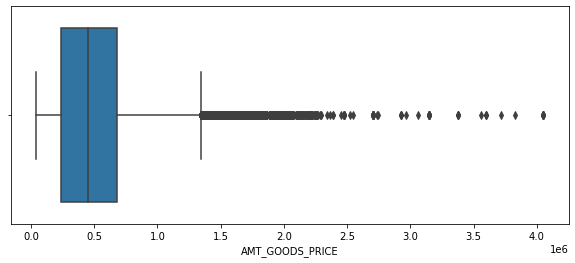

In [61]:
plt.figure(figsize=[10,4])
sns.boxplot(app_df.AMT_GOODS_PRICE)
plt.show()

#### Analyse DAYS_BIRTH column for outliers

In [62]:
app_df.DAYS_BIRTH.describe()

count    307510.000000
mean         43.435999
std          11.954600
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

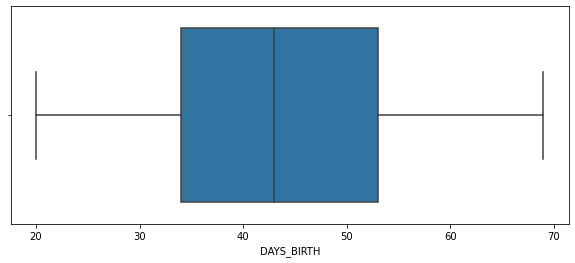

In [63]:
plt.figure(figsize=[10,4])
sns.boxplot(app_df.DAYS_BIRTH)
plt.show()

## Univariate Analysis of Categorical Variables

#### Income Source

Text(0.5, 1.0, 'NAME_INCOME_TYPE')

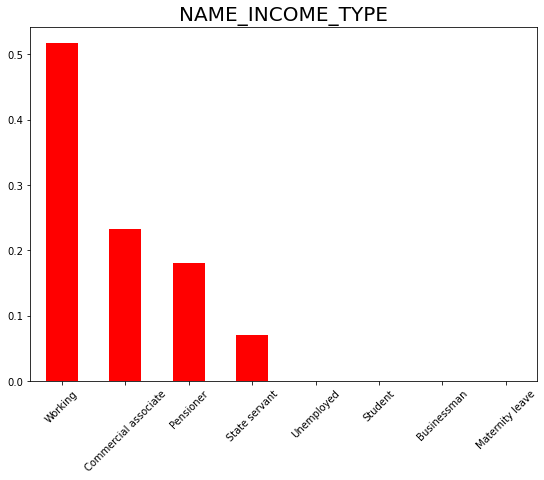

In [64]:
# For application table
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,30))
plt.subplot(4,2,1)
app_df.NAME_INCOME_TYPE.value_counts(normalize=True).plot.bar(color= "Red")
plt.xticks(rotation=45)
plt.title("NAME_INCOME_TYPE", fontsize=20)

Here, The graph indicates a decrease in the percentage of Payment difficulties who are pensioner and an increase in the percentage of Payment difficulties who are working when compared the percentage of both Payment difficulties and non-Payment difficulties

## Education

Text(0.5, 1.0, 'NAME_EDUCATION_TYPE')

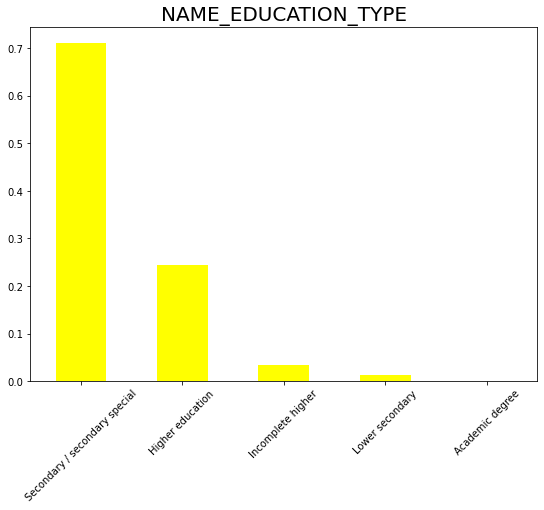

In [65]:
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,30))
plt.subplot(4,2,2)
app_df.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar(color= "Yellow")
plt.xticks(rotation=45)
plt.title("NAME_EDUCATION_TYPE", fontsize= 20)

Here, The graph indicates an increase in percentage of Loan Payment Difficulties whose educational qualifications are secondary/secondary special and a decrease in the percentage of loan payment difficulties who have completed higher education when compared with the percentages of Loan Payment Difficulties and Loan Non-Payment Difficulties.

## Family Status

Text(0.5, 1.0, 'NAME_FAMILY_STATUS')

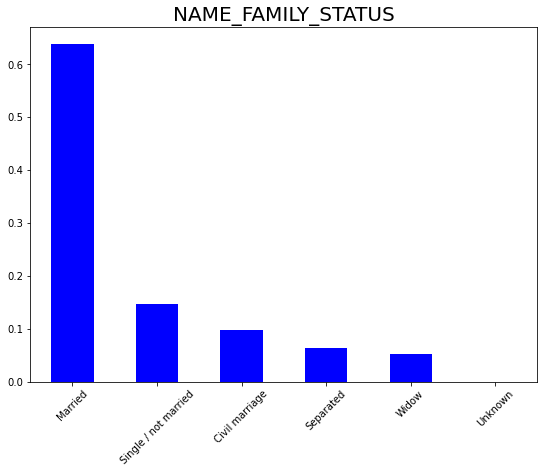

In [66]:
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,30))
plt.subplot(4,2,3)
app_df.NAME_FAMILY_STATUS.value_counts(normalize=True).plot.bar(color= "Blue")
plt.xticks(rotation=45)
plt.title("NAME_FAMILY_STATUS", fontsize= 20)

Here, The graph indicates a decrease in the percentage of married and widowed with Loan Payment Difficulties and an increase in the percentage of single and civil married with Loan Payment Difficulties when compared with the percentages of both Loan Payment Difficulties and Loan Non-Payment Difficulties.

## Housing

Text(0.5, 1.0, 'NAME_HOUSING_TYPE')

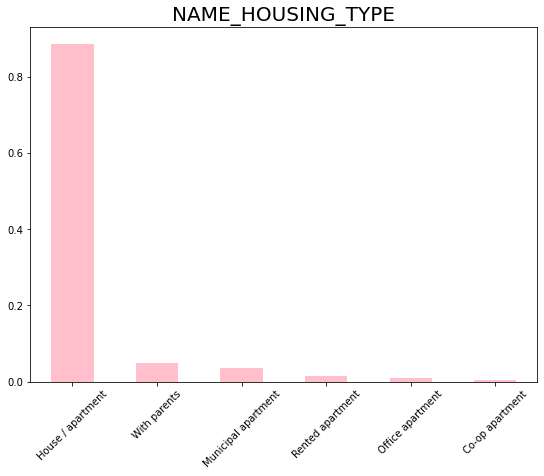

In [67]:
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,30))
plt.subplot(4,2,4)
app_df.NAME_HOUSING_TYPE.value_counts(normalize=True).plot.bar(color= "Pink")
plt.xticks(rotation=45)
plt.title("NAME_HOUSING_TYPE", fontsize= 20)

Here, The graph indicates the percentage of Payment Difficulties who live with their parents when compared to the percentages of Payment difficulties and non-Payment Difficulties.

## Organization Type

Text(0.5, 1.0, 'OCCUPATION_TYPE')

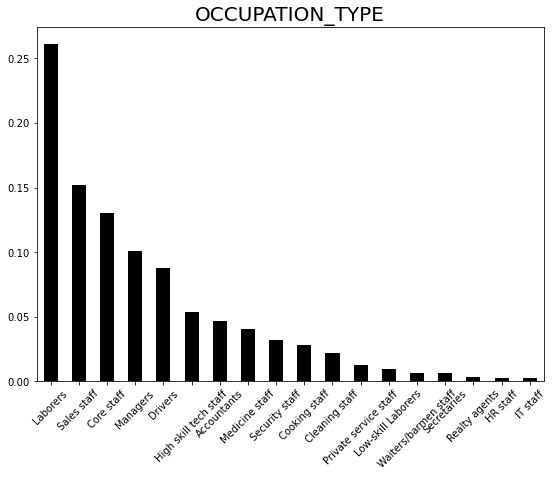

In [68]:
plt.rcParams.update({'font.size':10})
plt.figure(figsize = (20,30))
plt.subplot(4,2,6)
app_df.OCCUPATION_TYPE.value_counts(normalize=True).plot.bar(color= "Black")
plt.xticks(rotation=45)
plt.title("OCCUPATION_TYPE", fontsize= 20)

Here, no major changes.

# Dividing the dataset into two different datasets based upon 'Target' value.

In [72]:
# Dividing the original dataset into two different datasets depending upon the target
target0 = app_df.loc[app_df.TARGET == 0]
target1 = app_df.loc[app_df.TARGET == 1]

## Univariate Analysis of Numerical Variables on the basis of 'Target' Variable

In [80]:
# Function for univariate plots
def uni(df,col,hue =None):
    sns.set(style="darkgrid")
    fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
    ax[0].set_title("Distribution Plot")
    sns.distplot(df[~df[col].isna()][col],ax=ax[0], color="#4CB391")
    plt.yscale('log')
    ax[1].set_title("Box Plot")
    sns.boxplot(data =df, x=col,ax=ax[1],orient='v', color="#4CB391")
    plt.yscale('log')
    plt.show()

## Loan Annuity

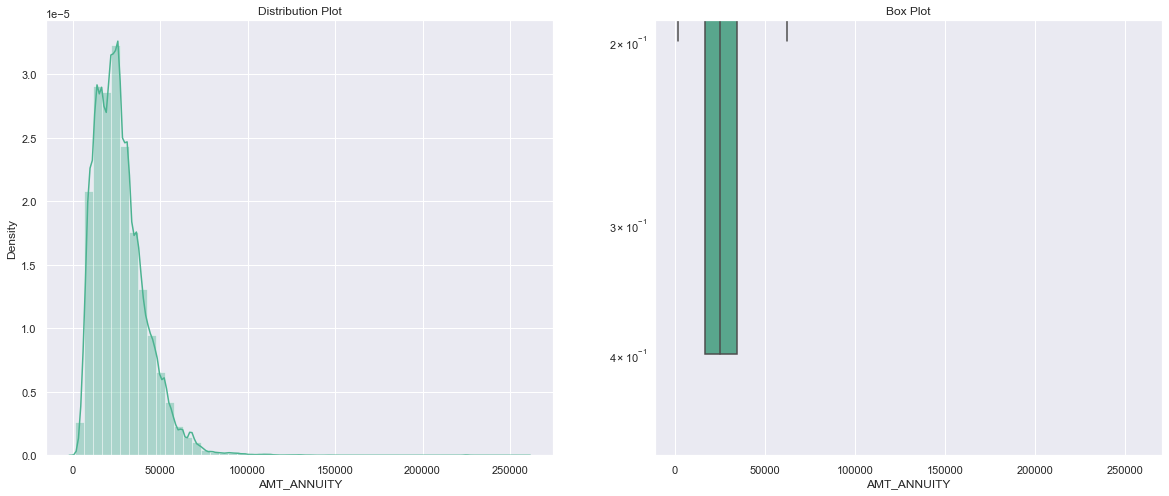

In [83]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan Non-Payment Difficulties
uni(df=target0,col='AMT_ANNUITY')

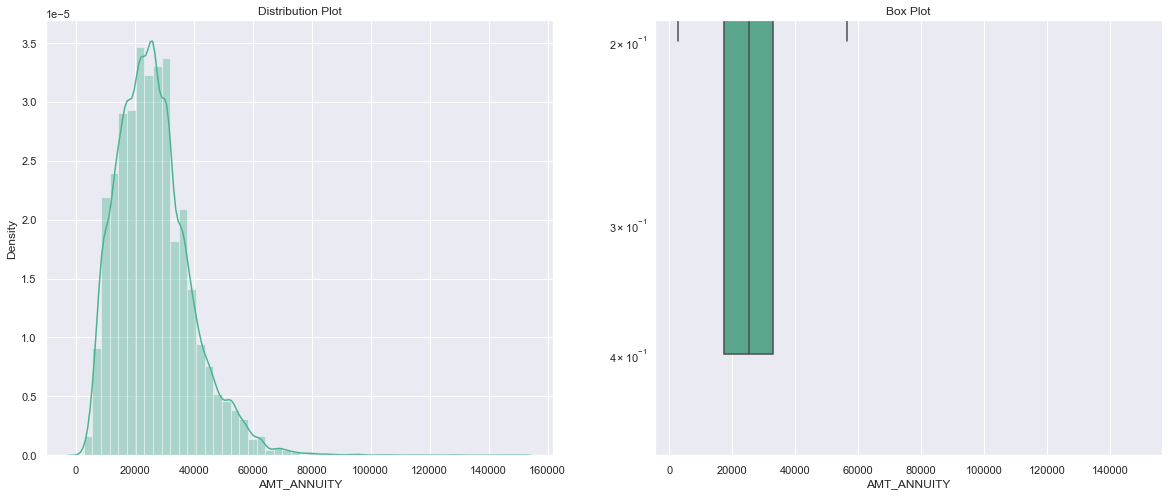

In [82]:
# Distribution and Box plot for 'AMT_ANNUITY' for Loan- Payment Difficulties
uni(df=target1,col='AMT_ANNUITY')

We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile.

### Credit Amount

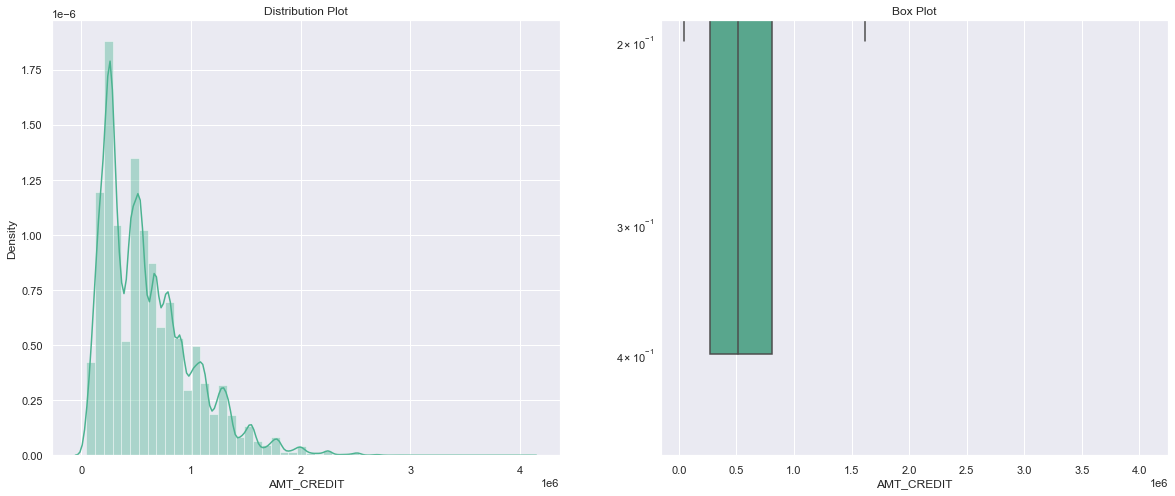

In [84]:
# Distribute and Box plot for 'AMT_CREDIT' for Loan Non-Payment Difficulties
uni(df=target0,col='AMT_CREDIT')

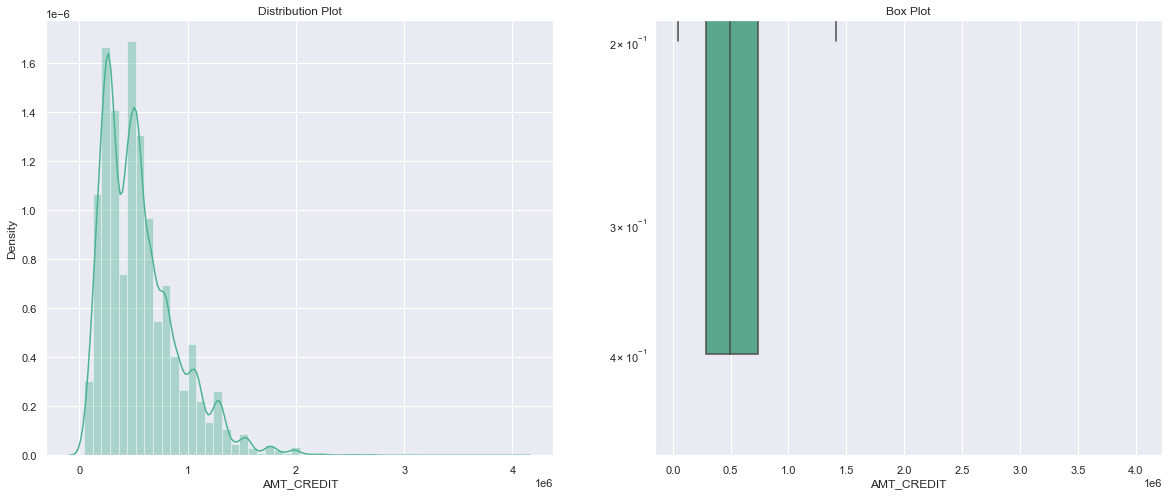

In [85]:
# Distribution and Box plot for 'AMT_CREDIT' for Loan Payment Difficulties
uni(df=target1,col='AMT_CREDIT')

We can observe some outliers and the first quartile is bigger than third quartile for annuity amount which means most of the annuity clients are from first quartile. The distribution curve does not appear to be normal or bell curve.

### Bivariate Analysis of Numerical vs Numerical Variables

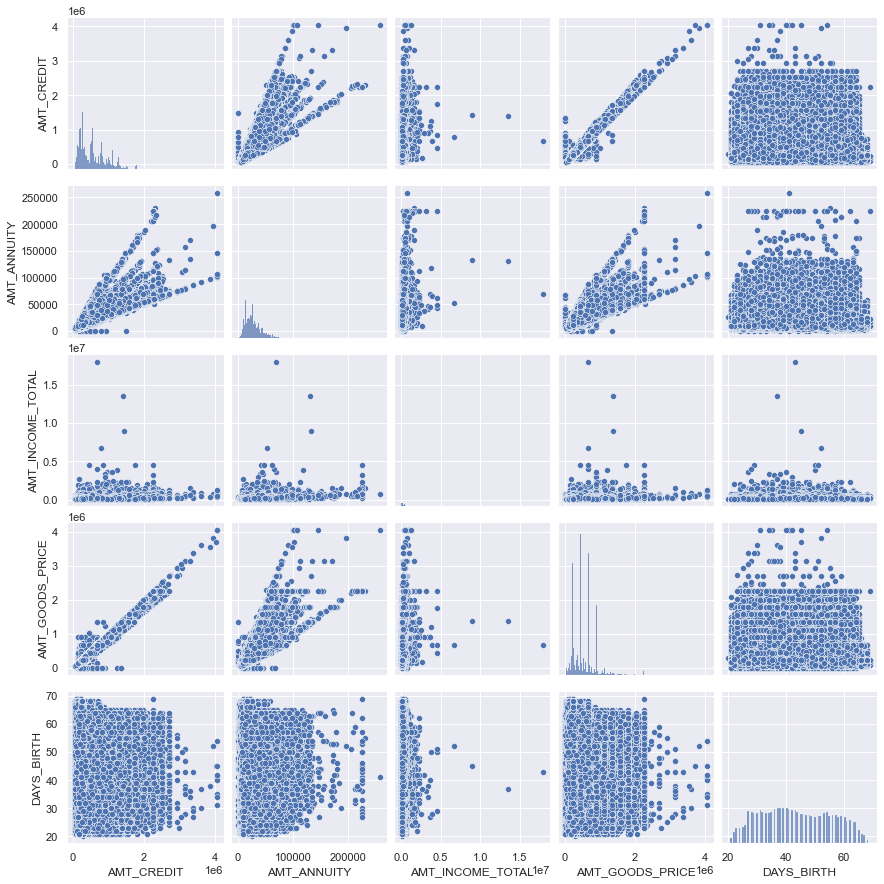

In [87]:
# Pairplot for target 0 (Loan-Non Payment Difficulties)
pair = target0[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL','AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

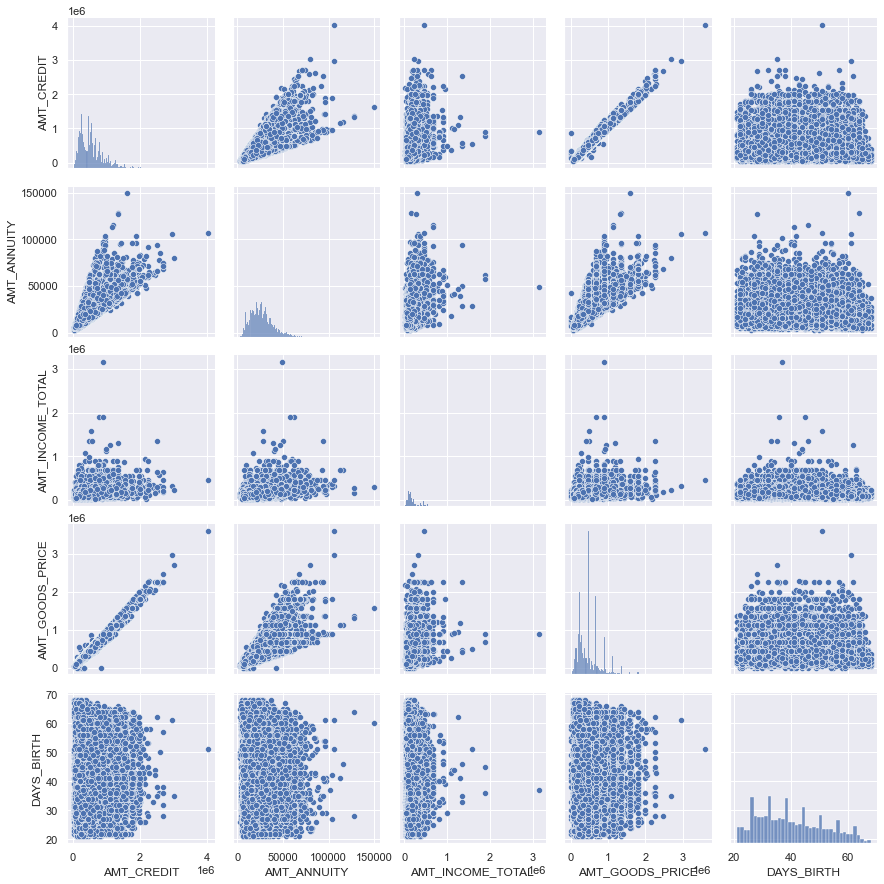

In [88]:
# Pairplot for target 1(Loan Payment Difficulties)
pair = target1[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'DAYS_BIRTH']].fillna(0)
sns.pairplot(pair)

plt.show()

In [90]:
# Heatmap for Loan-Non Payment Difficulties
target0[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH','DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','AMT_CREDIT',]].corr().style.background_gradient(cmap="coolwarm")

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.349462,0.776686,-0.068609,0.044552,-0.015916,0.003649,0.987250
AMT_INCOME_TOTAL,0.349462,1.000000,0.418953,-0.140392,-0.062494,-0.064937,-0.022896,0.342799
AMT_ANNUITY,0.776686,0.418953,1.000000,-0.104978,-0.012254,-0.039436,-0.014113,0.771309
DAYS_EMPLOYED,-0.068609,-0.140392,-0.104978,1.000000,0.626028,0.214511,0.276663,-0.070104
DAYS_BIRTH,0.044552,-0.062494,-0.012254,0.626028,1.000000,0.333025,0.270804,0.047366
DAYS_REGISTRATION,-0.015916,-0.064937,-0.039436,0.214511,0.333025,1.000000,0.100236,-0.013477
DAYS_ID_PUBLISH,0.003649,-0.022896,-0.014113,0.276663,0.270804,0.100236,1.000000,0.001464
AMT_CREDIT,0.987250,0.342799,0.771309,-0.070104,0.047366,-0.013477,0.001464,1.000000


In [91]:
# Heatmap for Loan-Payment Difficulties
target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT']].corr().style.background_gradient(cmap="coolwarm")

,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_ANNUITY,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_CREDIT
AMT_GOODS_PRICE,1.000000,0.327484,0.752699,0.006640,0.135602,0.025682,0.056089,0.983103
AMT_INCOME_TOTAL,0.327484,1.000000,0.398260,-0.107740,0.002508,-0.038519,0.003676,0.325386
AMT_ANNUITY,0.752699,0.398260,1.000000,-0.081208,0.014028,-0.034279,0.016768,0.752195
DAYS_EMPLOYED,0.006640,-0.107740,-0.081208,1.000000,0.582438,0.192468,0.229102,0.001930
DAYS_BIRTH,0.135602,0.002508,0.014028,0.582438,1.000000,0.289135,0.252272,0.135072
DAYS_REGISTRATION,0.025682,-0.038519,-0.034279,0.192468,0.289135,1.000000,0.096818,0.025854
DAYS_ID_PUBLISH,0.056089,0.003676,0.016768,0.229102,0.252272,0.096818,1.000000,0.052329
AMT_CREDIT,0.983103,0.325386,0.752195,0.001930,0.135072,0.025854,0.052329,1.000000


We observe that there is a high correlation between credit amount and goods price. There appears to be some deviancies in the correlation of Loan-Payment Difficulties and Loan- Non Payment Difficulties such as credit amount v/s income. 

Top 10 Correlation for client with payment difficulties

In [92]:
corr=target1[['AMT_GOODS_PRICE','AMT_INCOME_TOTAL','AMT_ANNUITY','DAYS_EMPLOYED','DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_CREDIT']].corr(method ='pearson')
corr=corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
corr_df=corr.unstack().reset_index()

In [93]:
corr_df.columns = ['VAR1','VAR2','CORRELATION']
corr_df.dropna(subset=['CORRELATION'],inplace=True)
corr_df['CORR_ABS']=corr_df['CORRELATION'].abs()
corr_df.sort_values('CORR_ABS', ascending=False).head(10)

,VAR1,VAR2,CORRELATION,CORR_ABS
56,AMT_CREDIT,AMT_GOODS_PRICE,0.983103,0.983103
16,AMT_ANNUITY,AMT_GOODS_PRICE,0.752699,0.752699
58,AMT_CREDIT,AMT_ANNUITY,0.752195,0.752195
35,DAYS_BIRTH,DAYS_EMPLOYED,0.582438,0.582438
17,AMT_ANNUITY,AMT_INCOME_TOTAL,0.398260,0.398260
8,AMT_INCOME_TOTAL,AMT_GOODS_PRICE,0.327484,0.327484
57,AMT_CREDIT,AMT_INCOME_TOTAL,0.325386,0.325386
44,DAYS_REGISTRATION,DAYS_BIRTH,0.289135,0.289135
52,DAYS_ID_PUBLISH,DAYS_BIRTH,0.252272,0.252272
51,DAYS_ID_PUBLISH,DAYS_EMPLOYED,0.229102,0.229102


The above dataframe shows top 10 correlation for clients with payment difficulties

# Data Analysis on Previous Application data

### Data loading and cleaning

In [ ]:
# loading the previous_application.csv
appdata_prev= pd.read_csv('previous_application.csv')
# changing the negative values in the columns whose name start with DAYS to positive values.
filter_col = [col for col in appdata_prev if col.startswith('DAYS')]
appdata_prev[filter_col]= abs(appdata_prev[filter_col])
appdata_prev.head()

In [94]:
# Loading the previous_application.csv
pre_app_df= pd.read_csv('previous_application.csv')

In [95]:
pre_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
# Changing the negative values in the columns whose name start with Days to positive values.
filter_col = [col for col in pre_app_df if col.startswith('DAYS')]
pre_app_df[filter_col]= abs(pre_app_df[filter_col])

In [99]:
pre_app_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
# XNA and XAP are replaced by NaN
pre_app_df = pre_app_df.replace('XNA', np.NaN)
pre_app_df = pre_app_df.replace('XAP', np.NaN)

In [101]:
# Value counts of Contract Status in previous application
pre_app_df['NAME_CONTRACT_STATUS'].value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

# Univariate analysis of numerical columns

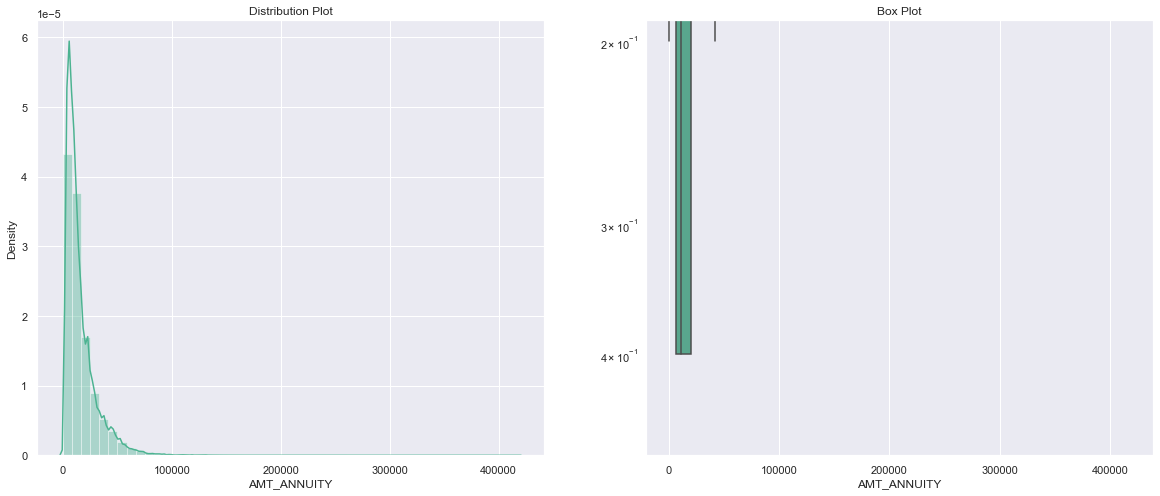

In [102]:
uni(df=pre_app_df,col='AMT_ANNUITY')

We observe that there are some outliers and the curve is not normal or a bell curve.

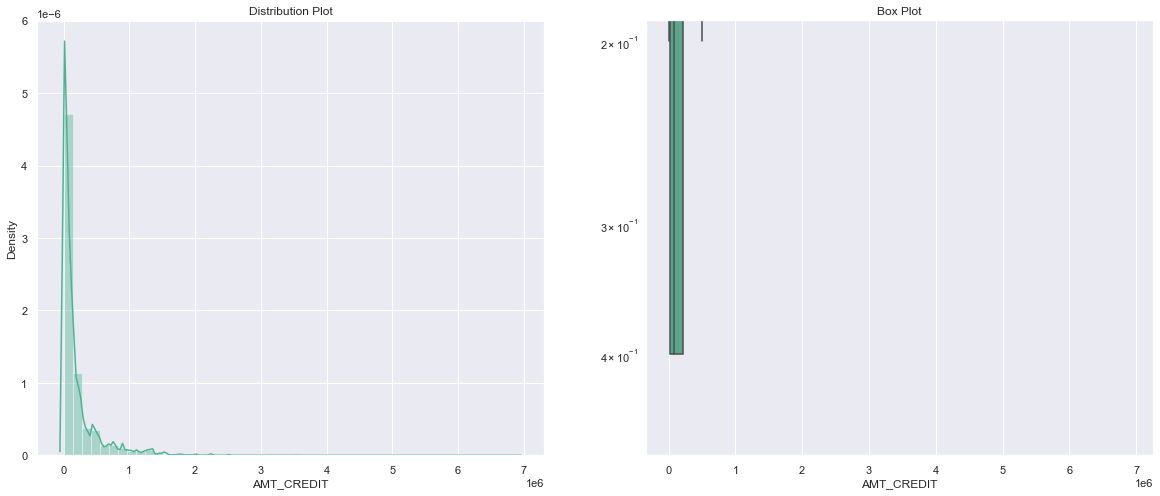

In [103]:
uni(df=pre_app_df,col='AMT_CREDIT')

We observe that there are some outliers and the curve is not normal or a bell curve.

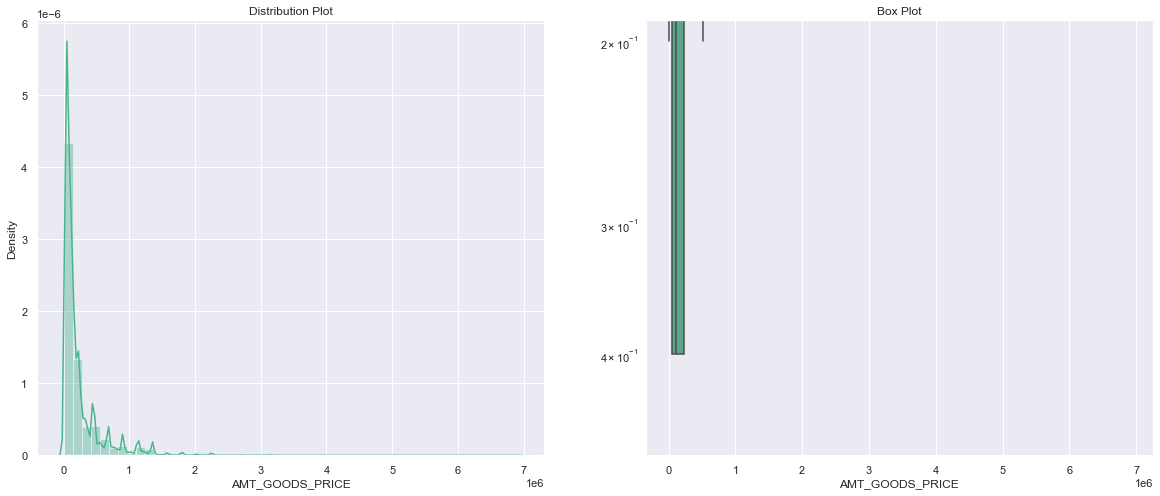

In [104]:
uni(df=pre_app_df,col='AMT_GOODS_PRICE')

We observe that there are some outliers and the curve .is not normal or a bell curve.

In [ ]:
4.3 Merged Dataframe Analysis
## Merging the two files to do some analysis
NewLeftPrev = pd.merge(appdata, appdata_prev, how='left', on=['SK_ID_CURR'])
NewLeftPrev.shape

# Merged Dataframe Analysis

In [106]:
## Merging the two files to do some analysis
New_left_prev = pd.merge(app_df, pre_app_df, how='left', on=['SK_ID_CURR'])

In [107]:
New_left_prev.shape

(1430152, 111)

In [108]:
New_left_prev.info

<bound method DataFrame.info of          SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0            100002       1           Cash loans           M            N   
1            100003       0           Cash loans           F            N   
2            100003       0           Cash loans           F            N   
3            100003       0           Cash loans           F            N   
4            100004       0      Revolving loans           M            Y   
...             ...     ...                  ...         ...          ...   
1430147      456255       0           Cash loans           F            N   
1430148      456255       0           Cash loans           F            N   
1430149      456255       0           Cash loans           F            N   
1430150      456255       0           Cash loans           F            N   
1430151      456255       0           Cash loans           F            N   

        FLAG_OWN_REALTY  CNT_CHILDREN  AMT_

In [109]:
New_left_prev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430152 entries, 0 to 1430151
Columns: 111 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(2), float64(40), int32(1), int64(40), object(28)
memory usage: 1.2+ GB


In [113]:
def plotuni_combined(Varx,Vary):
    # 100% bar chart
    plt.style.use('ggplot')
    sns.despine
    NewDat = New_left_prev.pivot_table(values='SK_ID_CURR',
                        index=Varx,
                        columns=Vary,
                        aggfunc='count')
    NewDat=NewDat.div(NewDat.sum(axis=1),axis='rows')*100
    sns.set()
    NewDat.plot(kind='bar',stacked=True,figsize=(15,5))
    plt.title(f'Effect Of {Varx} on Loan Approval')
    plt.xlabel(f'{Varx}')
    plt.ylabel(f'{Vary}%')
    plt.show()

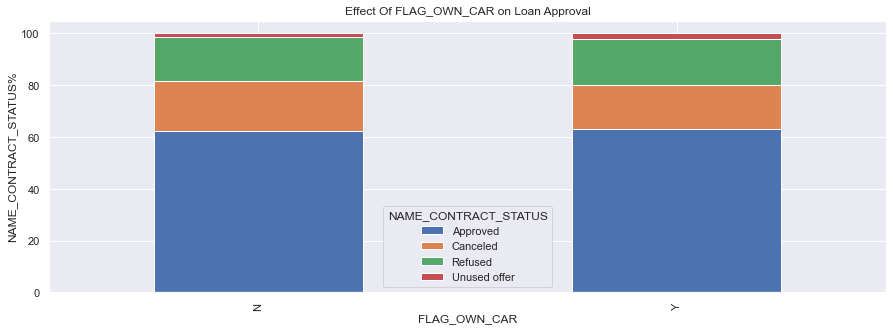

In [114]:
plotuni_combined('FLAG_OWN_CAR','NAME_CONTRACT_STATUS')

We see taht car ownership doesn't have any effect on application approval or rejection. But we saw earlier that the people who has a car has lesser chances of default. The bank can add more weightage to car ownership while approving a loan amount.

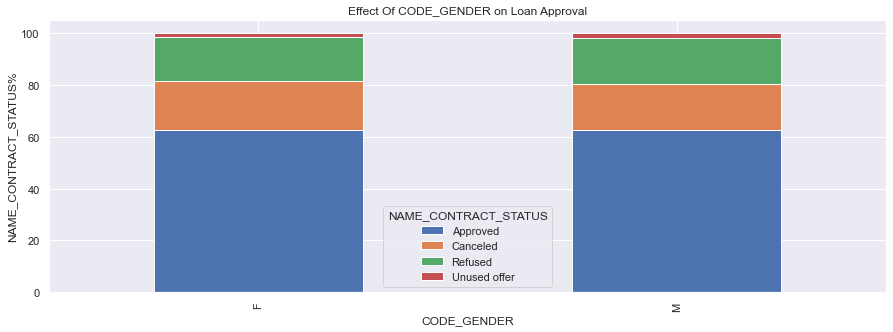

In [115]:
plotuni_combined('CODE_GENDER', 'NAME_CONTRACT_STATUS')

We see that code gender doesn't have any effect on application approval or rejection.
But we saw earlier that female have lesser chances of default compared to males. The bank can add more weightage to female while approving a loan amount.

##### Target variable (0- Non Defaulter 1 - Defaulter )

We can see that the people who were approved for a loan earlier, defaulted less often where as people who were refused a loan earlier have higher chances of defaulting.